### NLP Report: Text Classifier Implementation and Evaluation

### I. Introduction

#### 1. Domain-specific area
The domain for this coursework is sentiment analysis, specifically focusing on public sentiment regarding COVID-19 vaccines. Text classification methods can significantly contribute to understanding public opinion, identifying misinformation, and guiding public health communication strategies. Relevant studies, such as "Sentiment Analysis on COVID-19 Vaccine-Related Tweets" (Sharma et al., 2021), highlight the importance of sentiment analysis in addressing pandemic-related challenges.

##### References

**Misleading the COVID-19 Vaccination Discourse on Twitter: An Exploratory Study of Infodemic Around the Pandemic**  
Sharma, Sharma, and Datta (2021) collected approximately 200,000 tweets related to COVID-19 vaccination over seven months. They used the XLNet model to classify tweets as misleading or non-misleading, achieving up to 90% accuracy, and analyzed features contributing to misinformation spread. 

**Classifying Tweets Sentiment about the COVID-19 Vaccine in Italy**  
This study by Chiara Lovati (2022) compared machine learning models to classify sentiments in Italian tweets about COVID-19 vaccines. It evaluated feature extraction techniques like Bag of Words and TF-IDF, and found that ensemble methods, particularly Random Forest, achieved high accuracy in sentiment classification. 

**Cognitive Networks Identify the Content of English and Italian Popular Posts about COVID-19 Vaccines: Anticipation, Logistics, Conspiracy, and Loss of Trust**  
Stella, Vitevitch, and Botta (2021) analyzed 4,765 popular tweets in English and Italian to understand public discourse on COVID-19 vaccines. They found that discussions were polarized between trust in vaccines and concerns about distribution logistics, with conspiracy theories present in English tweets but absent in Italian ones. 

**Mining Trends of COVID-19 Vaccine Beliefs on Twitter with Lexical Embeddings**  
Chopra et al. (2021) examined 1.8 million tweets from five countries to track emotions and influencing factors related to COVID-19 vaccines. They observed that tweets expressing hesitancy contained the highest mentions of health-related effects, with variability across geographies, highlighting the need for targeted interventions. 

**Deep Learning Reveals Patterns of Diverse and Changing Sentiments Towards COVID-19 Vaccines Based on 11 Million Tweets**  
Wang et al. (2022) analyzed over 11 million vaccine-related tweets using a fine-tuned XLNet model. They found that user sentiments became more positive over time, correlating with vaccine uptake, and noted distinct patterns across subpopulations, suggesting the need for tailored communication strategies. 

These studies highlight the diverse methodologies and findings in analyzing public sentiment toward COVID-19 vaccines on Twitter. 

#### 2. Objectives
The primary objectives are:
- To compare the effectiveness of traditional statistical models (KNN, Naïve Bayes, Decision Trees, Random Forest, XG Boost) with embedding-based deep learning models (LSTM).
- To explore the applicability of these models in sentiment classification tasks.
- To evaluate the performance of both methodologies using metrics such as accuracy, precision, recall, and F1-score.

#### 3. Dataset Description
The dataset used is the "COVID-19 Vaccine Tweets with Sentiment" dataset, which includes labeled tweets indicating positive, neutral, and negative sentiments. Key details include:
- **Size**: 6,000 tweets.
- **Data Types**: Textual data (tweet content) and categorical labels (sentiment).
- **Source**: Acquired from Kaggle’s official repository.
- **Data Acquisition**: Collected from Twitter via web scraping APIs.

#### 4. Evaluation methodology
Performance metrics for model evaluation include:
- **Accuracy**: Overall correctness of predictions.
- **Precision**: Proportion of true positive predictions in a specific class.
- **Recall**: Ability of the model to retrieve all relevant instances.
- **F1-Score**: Harmonic mean of precision and recall.

### II. Implementation

#### 5. Data Preprocessing
The dataset underwent the following preprocessing steps:
- **Text Normalization**: Conversion to lowercase.
- **Tokenization**: Splitting text into individual words using a regex tokenizer.
- **Stopword Removal**: Elimination of common words using NLTK’s stopword list.
- **Stemming**: Conversion of words to their root forms using the Porter Stemmer.
- **Text Representation**:
  - Bag-of-Words (CountVectorizer) for statistical models.
  - Word embeddings for deep learning models.

#### 6. Baseline Performance
The baseline model is a Multinomial Naïve Bayes classifier, which serves as a benchmark due to its simplicity and widespread use in text classification tasks.

#### 7. Comparative Classification Approach
- **Statistical Models**:
  - K-Nearest Neighbors (KNN)
  - Decision Tree (DT)
  - Random Forest (RF)
  - Multinomial Naïve Bayes (MNB)
- **Embedding-Based Model**:
  - Long Short-Term Memory (LSTM) network, trained on padded sequences of tweets using the TensorFlow/Keras library.

#### 8. Programming Style
The code was developed in Python using a modular approach. Libraries included NLTK, Scikit-learn, TensorFlow, and Plotly. Code is well-documented with inline comments and explanations of key choices.


In [1]:
pip install wordcloud xgboost plotly

Note: you may need to restart the kernel to use updated packages.


### Importing Required Libraries

This section imports the essential libraries and tools for data analysis, machine learning, and natural language processing tasks. Here's what each library is used for:

- **`numpy`** and **`pandas`**: Efficient data manipulation, numerical operations, and analysis.
- **`nltk`**: Tools for natural language processing, such as tokenization and stemming.
- **`sklearn`**: A suite of machine learning models, feature extraction, and evaluation metrics.
- **`xgboost`**: Gradient-boosted tree algorithms for classification and regression tasks.
- **`tensorflow`**: Framework for implementing modern deep learning models, particularly for sequence data.


In [2]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


### Loading and Exploring the Dataset

This section handles the following tasks related to dataset loading and initial exploration:

- **Loads the dataset** from a CSV file using `pandas`.
- **Displays the first two rows** to get an overview of the dataset structure.
- **Checks for missing values** and reports the count of `null` entries.
- **Provides descriptive statistics** of the dataset to understand its distribution.
- **Downloads `nltk` stopwords** for text preprocessing (if applicable).


In [3]:
import codecs
path0='covid-19_vaccine_tweets_with_sentiment.csv'
with codecs.open(path0, 'r', 'utf-8', 'ignore') as f:
    df = pd.read_csv(f)
df[0:2]

,tweet_id,label,tweet_text
0,1.360342e+18,1,"4,000 a day dying from the so called Covid-19 ..."
1,1.382896e+18,2,Pranam message for today manifested in Dhyan b...


In [4]:
df.isnull().sum()

tweet_id      0
label         0
tweet_text    0
dtype: int64

In [5]:
df.describe()

,tweet_id,label
count,6.000000e+03,6000.000000
mean,1.372192e+18,2.246667
std,1.036489e+16,0.570856
min,1.337736e+18,1.000000
25%,1.366304e+18,2.000000
50%,1.373906e+18,2.000000
75%,1.380625e+18,3.000000
max,1.385237e+18,3.000000


### Initializing NLP Tools

This section performs the following steps to prepare for text preprocessing:

- **Downloads and imports stopwords** from `nltk` for filtering out common words during text cleaning.
- **Initializes a tokenizer** (`RegexpTokenizer`) to split text into individual words based on a regular expression.
- **Sets up a PorterStemmer** to reduce words to their base or root form.
- **Creates a set of English stopwords** to filter out common, non-informative words from the text.

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords
tokenizer=RegexpTokenizer(r'\w+')

ps=PorterStemmer()

In [8]:
en_stop=set(stopwords.words('english'))

### Text Cleaning Function

The `getCleanedText` function is designed to preprocess the text by performing the following steps:

- **Convert text to lowercase** to standardize and avoid case-based discrepancies.
- **Tokenize the text** into individual words using the tokenizer.
- **Remove stopwords** to filter out common, non-informative words.
- **Apply stemming** using the PorterStemmer to reduce words to their root forms.
- **Return the cleaned text** for further analysis or model training.

In [9]:
def getCleanedText(text):
    text=text.lower()
    tokens=tokenizer.tokenize(text)
    new_tokens=[token for token in tokens if token not in en_stop]
    stemmed_tokens=[ps.stem(tokens) for tokens in new_tokens]
    clean_text=" ".join(stemmed_tokens)
    return clean_text

### Applying Text Cleaning

The `getCleanedText` function is applied to all tweets in the dataset to preprocess and clean the text. This step ensures that the tweets are ready for further analysis, such as feature extraction or model training.

- **Applies text cleaning**: The `getCleanedText` function is used to clean each tweet by converting it to lowercase, tokenizing it, removing stopwords, and applying stemming.
- **Displays the first few cleaned tweets**: After cleaning, the first few tweets are displayed to verify the preprocessing.

In [10]:
df['tweet_text']=df['tweet_text'].apply(getCleanedText)

In [11]:
df['tweet_text'].head(6)

0    4 000 day die call covid 19 vaccin dailybeast ...
1    pranam messag today manifest dhyan meenapranam...
2    hyderabad base bharatbiotech sought fund gover...
3    confirm chines vaccin dont high protect rate a...
4    lab studi suggest pfizer moderna vaccin protec...
5    still want take jab pfizerbiontech sideeffect ...
Name: tweet_text, dtype: object

### Vectorizing Text Data

In this Section `CountVectorizer` is used to convert the cleaned text into a numerical format that can be fed into machine learning models. Specifically, it transforms the text into a **bag-of-words** representation while also incorporating **n-grams** (unigrams and bigrams) to capture more context from the text.

- **Bag-of-Words Representation**: Converts the cleaned text into a matrix where each row represents a document (tweet) and each column represents a unique word or n-gram.
- **N-grams (1 and 2)**: Captures both single words (unigrams) and pairs of consecutive words (bigrams) to better understand the context.

In [12]:
cv=CountVectorizer(ngram_range=(1,2))
X_cv=cv.fit_transform(df['tweet_text']).toarray()

### Splitting Data into Train and Test Sets

This section prepares the dataset for model training by splitting it into two subsets: one for training the model and the other for evaluating its performance.

- **Features (`X`)**: The input data, which in this case are the vectorized representations of the cleaned tweet text.
- **Labels (`y`)**: The target variable, which represents the sentiment labels of the tweets.
- **Train-Test Split**: The data is split into training and test sets using an 80/20 ratio. This means 80% of the data is used for training the model, and 20% is reserved for testing its performance.

In [13]:
X=X_cv
y=df['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

## Feature Engineering

### Generating Word Clouds and Analyzing Sentiments

This section visualizes the textual and sentiment distribution of tweets through word clouds and bar plots.
### Features:
1. **Word Clouds**:
   - Creates visually appealing word clouds for each sentiment class (negative, neutral, positive).
   - Displays the most frequent words for each sentiment in a clear and engaging way.

2. **Sentiment Distribution**:
   - Analyzes the distribution of tweets across sentiment classes.
   - Visualizes the sentiment counts using a bar plot.

3. **Tweet Counts**:
   - Prints the total count of tweets for each sentiment class.

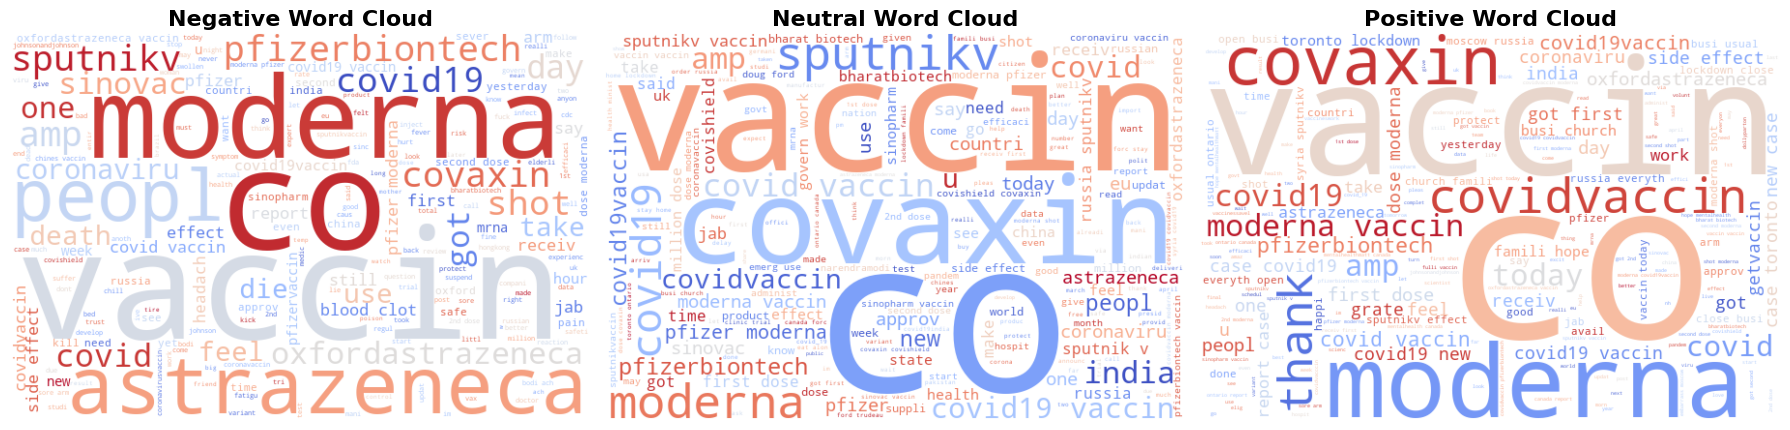


Sentiment Analysis Results:
Neutral Tweets: 3680
Positive Tweets: 1900
Negative Tweets: 420


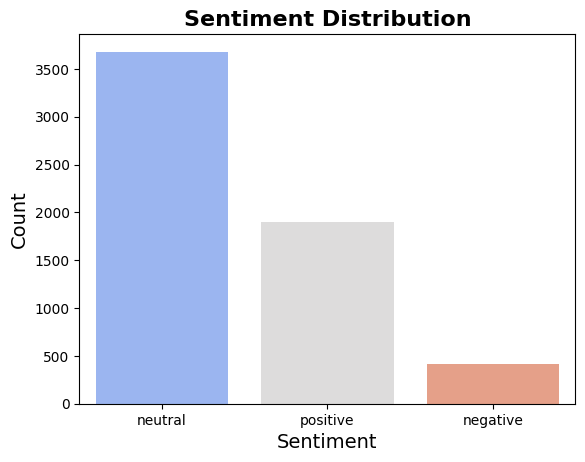

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Generate an advanced word cloud by sentiment labels
def generate_advanced_word_cloud_by_labels():
    # Mapping numerical labels to sentiment names
    label_mapping = {1: 'negative', 2: 'neutral', 3: 'positive'}
    
    # Combine all cleaned tweet text into separate strings by sentiment
    sentiment_texts = {
        label_mapping[label]: " ".join(df[df['label'] == label]['tweet_text'])
        for label in label_mapping
    }

    # Create WordCloud objects for each sentiment
    plt.figure(figsize=(18, 6))  # Create a single figure for all subplots
    valid_sentiments = 0  # Counter for valid sentiments with non-empty text
    for sentiment, text in sentiment_texts.items():
        if not text.strip():  # Check if the text is empty
            print(f"Skipping {sentiment.capitalize()} sentiment as it has no text.")
            continue

        valid_sentiments += 1
        wordcloud = WordCloud(
            width=600,
            height=400,
            background_color='white',  # Match the example background
            colormap='coolwarm'  # Match the example colormap
        ).generate(text)

        # Display the word cloud in a subplot
        plt.subplot(1, 3, valid_sentiments)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"{sentiment.capitalize()} Word Cloud", fontsize=16, fontweight='bold')
        plt.axis("off")

    if valid_sentiments > 0:
        plt.tight_layout()
        plt.show()
    else:
        print("No sentiments contain enough data to generate word clouds.")

    # Analyze sentiments
    df['sentiment_name'] = df['label'].map(label_mapping)  # Add a column with sentiment names
    sentiment_counts = df['sentiment_name'].value_counts()
    print("\nSentiment Analysis Results:")
    for sentiment, count in sentiment_counts.items():
        print(f"{sentiment.capitalize()} Tweets: {count}")

    # Create a bar plot for sentiment distribution
    sns.barplot(
        x=sentiment_counts.index, 
        y=sentiment_counts.values, 
        hue=sentiment_counts.index,  # Assign the x variable to hue
        dodge=False, 
        palette="coolwarm",
        legend=False,  # Disable the legend as it is redundant
    )
    plt.title("Sentiment Distribution", fontsize=16, fontweight='bold')
    plt.xlabel("Sentiment", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.show()

# Generate word clouds and sentiment analysis using pre-existing labels
generate_advanced_word_cloud_by_labels()


### Menu to Display Tweets
This section provides an interactive menu allowing users to display 10 random tweets for each sentiment class (positive, negative, or neutral) or exit the menu.
### Features:
1. **Sentiment Classes**:
   - **Positive Tweets**: Option 1 to view 10 random positive tweets.
   - **Negative Tweets**: Option 2 to view 10 random negative tweets.
   - **Neutral Tweets**: Option 3 to view 10 random neutral tweets.

2. **Interactive Menu**:
   - Users are prompted to select Option 4 or exit.
   - Invalid inputs are handled gracefully.

In [15]:
import random

# Function to display a menu and show tweets based on selection
def display_menu_and_tweets():
    label_mapping = {1: 'negative', 2: 'neutral', 3: 'positive'}
    
    while True:
        print("\nMenu:")
        print("1. Show 10 Positive Tweets")
        print("2. Show 10 Negative Tweets")
        print("3. Show 10 Neutral Tweets")
        print("4. Exit")

        choice = input("Enter your choice (1-4): ")

        if choice == '1':
            positive_tweets = df[df['label'] == 3]['tweet_text']
            if not positive_tweets.empty:
                positive_tweets = positive_tweets.sample(n=min(10, len(positive_tweets)), replace=False, random_state=random.randint(1, 1000))
                print("\n10 Random Positive Tweets:")
                for i, tweet in enumerate(positive_tweets, 1):
                    print(f"{i}. {tweet}")
            else:
                print("No positive tweets available.")

        elif choice == '2':
            negative_tweets = df[df['label'] == 1]['tweet_text']
            if not negative_tweets.empty:
                negative_tweets = negative_tweets.sample(n=min(10, len(negative_tweets)), replace=False, random_state=random.randint(1, 1000))
                print("\n10 Random Negative Tweets:")
                for i, tweet in enumerate(negative_tweets, 1):
                    print(f"{i}. {tweet}")
            else:
                print("No negative tweets available.")

        elif choice == '3':
            neutral_tweets = df[df['label'] == 2]['tweet_text']
            if not neutral_tweets.empty:
                neutral_tweets = neutral_tweets.sample(n=min(10, len(neutral_tweets)), replace=False, random_state=random.randint(1, 1000))
                print("\n10 Random Neutral Tweets:")
                for i, tweet in enumerate(neutral_tweets, 1):
                    print(f"{i}. {tweet}")
            else:
                print("No neutral tweets available.")

        elif choice == '4':
            print("Exiting the menu.")
            break

        else:
            print("Invalid choice. Please try again.")

# Display the menu for selecting tweets
display_menu_and_tweets()



Menu:
1. Show 10 Positive Tweets
2. Show 10 Negative Tweets
3. Show 10 Neutral Tweets
4. Exit

10 Random Positive Tweets:
1. timesofindia russian vaccin sputnikv efficaci 91 6 per cent provid full protect sever case covid19 demonstr data publish one lead medic journal lancet http co ql2zd88jgh
2. china hongkong sar formal approv emerg use sinovac vaccin thursday http co aocngaodwm
3. got first dosi moderna modernavaccin
4. thank cvspharmaci receiv first dose moderna covid19vaccin two day ago easi appoint side effect see next month second dose getvaccin http co js5dtomhkw
5. thank bmi covid vaccin time proud obes haiku covidvacccin covid_19 moderna feelinggood fauciouchi context qualifi shot due obes underli heath condit would complic catch http co h6knbm0p3u
6. got first jab moderna next jab 28 day feel like im live histori much im littl bit teari get vaccin peopl return live amp activ
7. huge thank everyon nhskentchft vaccin centr gravesend yesterday especi jess amanda covidvaccin 1 

### Keyword Search with Sentiment Categorization

This section allows users to search for tweets containing specific keywords, categorize them by sentiment, and display up to 5 random tweets for each sentiment class.
### Features:
1. **Keyword Search**: Users input a keyword to filter tweets containing it.
2. **Sentiment Categorization**:
   - Tweets are grouped by their sentiment: Positive, Neutral, and Negative.
   - Sentiment distribution is displayed.
3. **Random Sampling**: Up to 5 random tweets per sentiment are shown for a balanced view.


In [16]:
import random

# Keyword search with sentiment categorization
def keyword_search():
    label_mapping = {1: 'negative', 2: 'neutral', 3: 'positive'}
    keyword = input("Enter a keyword to search for: ").lower()

    if not keyword:
        print("No keyword entered. Please try again.")
        return

    # Filter tweets containing the keyword
    filtered_tweets = df[df['tweet_text'].str.contains(keyword, na=False, case=False)].copy()

    if filtered_tweets.empty:
        print(f"No tweets found containing the keyword: {keyword}")
        return

    # Add sentiment_name column
    filtered_tweets['sentiment_name'] = filtered_tweets['label'].map(label_mapping)

    # Group by sentiment and display counts
    sentiment_counts = filtered_tweets['sentiment_name'].value_counts()
    print(f"\nKeyword '{keyword}' Sentiment Distribution:")
    print(sentiment_counts)

    # Show up to 5 random tweets for each sentiment
    for label, sentiment in label_mapping.items():
        sentiment_filtered = filtered_tweets[filtered_tweets['label'] == label]
        sample_size = min(len(sentiment_filtered), 5)  # Ensure we don't sample more than available
        print(f"\n{sentiment.capitalize()} Tweets Containing '{keyword}':")

        if sample_size > 0:
            tweets = sentiment_filtered['tweet_text'].sample(n=sample_size, replace=False, random_state=random.randint(1, 1000))
            for i, tweet in enumerate(tweets, 1):
                print(f"{i}. {tweet}")
        else:
            print(f"No tweets found for {sentiment} sentiment.")

# Call the functions
keyword_search()



Keyword 'drug' Sentiment Distribution:
sentiment_name
neutral     49
positive    19
negative     6
Name: count, dtype: int64

Negative Tweets Containing 'drug':
1. ctvnew canada forc stay home home lockdown famili busi school drug abus violenc unemploy hope life govern deni us safe avail russia sputnik v vaccin covid19 mentalhealth jesu sputnikv http co 8f386nousr
2. advers reaction pfizer moderna covid19 vaccin mind alter drug manifest horror stori mass shot given vulner fever tired fauci cdc flushot
3. jnj europeanunion drug regul start review assess blood clot peopl receiv johnson amp johnson covid19 vaccin separ eu regul said doesnt yet enough evid approv russian sputnikv vaccin http co o6uxtzywzc
4. refer 2 vaccin lie misinfo vaccin experiment dna alter nanoparticl amp peg contain w ade non licens non fda approv femal infertil caus drug itsnotavaccin pfizer moderna astrazeneca peg ade mrna dna http co nclzu7akbd http co dxjud4ldva
5. russia sold sputnikv vaccin slovakia differ va

## Training  and Testing Deep Learning Classifiers and Model.

### Training and Evaluating KNN Classifier

This section details the training and evaluation of a KNN classifier for sentiment analysis. The model is assessed through accuracy scores, a confusion matrix, and a classification report.
### Features:
1. **Model Training**:
   - Builds a KNN classifier using the training dataset.

2. **Performance Evaluation**:
   - Computes accuracy for both training and test datasets.
   - Produces a confusion matrix and a classification report for comprehensive performance analysis.

In [17]:
k = 2
KNN = KNeighborsClassifier(n_neighbors=k)

# Train the KNN model
KNN_model = KNN.fit(X_train, y_train)

# Print training and test accuracies
print("Train Accuracy:", KNN_model.score(X_train, y_train))
print("Test Accuracy:", KNN_model.score(X_test, y_test))

# Predict on the test set
y_pred_knn = KNN_model.predict(X_test)

# Generate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix for KNN:\n", conf_matrix_knn)

# Classification report for detailed metrics
report_knn = classification_report(y_test, y_pred_knn)
print("\nClassification Report for KNN:\n", report_knn)


Train Accuracy: 0.860625
Test Accuracy: 0.6133333333333333

Confusion Matrix for KNN:
 [[  2  83   7]
 [ 12 635  84]
 [  0 278  99]]

Classification Report for KNN:
               precision    recall  f1-score   support

           1       0.14      0.02      0.04        92
           2       0.64      0.87      0.74       731
           3       0.52      0.26      0.35       377

    accuracy                           0.61      1200
   macro avg       0.43      0.38      0.37      1200
weighted avg       0.56      0.61      0.56      1200



### Training and Multinomial Naive Tree Classifier

This section details the training and evaluation of a Multinomial Naive classifier for sentiment analysis. The model is assessed through accuracy scores, a confusion matrix, and a classification report.
### Features:
1. **Model Training**:
   - Builds a Multinomial Naive classifier using the training dataset.

2. **Performance Evaluation**:
   - Computes accuracy for both training and test datasets.
   - Produces a confusion matrix and a classification report for comprehensive performance analysis.

In [18]:
# Train the Multinomial Naive Bayes model
MNB = MultinomialNB()
MNB_model = MNB.fit(X_train, y_train)

# Print training and test accuracies
print("Train Accuracy:", MNB_model.score(X_train, y_train))
print("Test Accuracy:", MNB_model.score(X_test, y_test))

# Predict on the test set
y_pred_mnb = MNB_model.predict(X_test)

# Generate confusion matrix
conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)
print("\nConfusion Matrix for Multinomial Naive Bayes:\n", conf_matrix_mnb)

# Classification report for detailed metrics
report_mnb = classification_report(y_test, y_pred_mnb)
print("\nClassification Report for Multinomial Naive Bayes:\n", report_mnb)


Train Accuracy: 0.9439583333333333
Test Accuracy: 0.6966666666666667

Confusion Matrix for Multinomial Naive Bayes:
 [[  4  57  31]
 [ 16 560 155]
 [  3 102 272]]

Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

           1       0.17      0.04      0.07        92
           2       0.78      0.77      0.77       731
           3       0.59      0.72      0.65       377

    accuracy                           0.70      1200
   macro avg       0.52      0.51      0.50      1200
weighted avg       0.67      0.70      0.68      1200



### Training and Evaluating Decision Tree Classifier

This section details the training and evaluation of a Decision Tree classifier for sentiment analysis. The model is assessed through accuracy scores, a confusion matrix, and a classification report.
### Features:
1. **Model Training**:
   - Builds a Decision Tree classifier using the training dataset.

2. **Performance Evaluation**:
   - Computes accuracy for both training and test datasets.
   - Produces a confusion matrix and a classification report for comprehensive performance analysis.

In [19]:
# Train the Decision Tree model
DT = DecisionTreeClassifier()
DT_model = DT.fit(X_train, y_train)

# Print training and test accuracies
print("Train Accuracy:", DT_model.score(X_train, y_train))
print("Test Accuracy:", DT_model.score(X_test, y_test))

# Predict on the test set
y_pred_dt = DT_model.predict(X_test)

# Generate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix for Decision Tree:\n", conf_matrix_dt)

# Classification report for detailed metrics
report_dt = classification_report(y_test, y_pred_dt)
print("\nClassification Report for Decision Tree:\n", report_dt)

Train Accuracy: 0.9997916666666666
Test Accuracy: 0.655

Confusion Matrix for Decision Tree:
 [[  7  63  22]
 [ 21 583 127]
 [ 15 166 196]]

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           1       0.16      0.08      0.10        92
           2       0.72      0.80      0.76       731
           3       0.57      0.52      0.54       377

    accuracy                           0.66      1200
   macro avg       0.48      0.46      0.47      1200
weighted avg       0.63      0.66      0.64      1200



### Training and Evaluating Random Forest Classifier

This section focuses on training and evaluating a Random Forest classifier for sentiment analysis. The model's performance is assessed using key metrics to ensure effective classification.
### Features:
1. **Model Training**:
   - Builds a Random Forest model using the training dataset.

2. **Performance Evaluation**:
   - Measures accuracy on both training and test datasets.
   - Generates a confusion matrix and classification report for in-depth performance insights.


In [20]:
# Train the Random Forest model
RF = RandomForestClassifier()
RF_model = RF.fit(X_train, y_train)

# Print training and test accuracies
print("Train Accuracy:", RF_model.score(X_train, y_train))
print("Test Accuracy:", RF_model.score(X_test, y_test))

# Predict on the test set
y_pred_rf = RF_model.predict(X_test)

# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix for Random Forest:\n", conf_matrix_rf)

# Classification report for detailed metrics
report_rf = classification_report(y_test, y_pred_rf)
print("\nClassification Report for Random Forest:\n", report_rf)

Train Accuracy: 0.9997916666666666
Test Accuracy: 0.7158333333333333

Confusion Matrix for Random Forest:
 [[  1  83   8]
 [  1 688  42]
 [  0 207 170]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

           1       0.50      0.01      0.02        92
           2       0.70      0.94      0.81       731
           3       0.77      0.45      0.57       377

    accuracy                           0.72      1200
   macro avg       0.66      0.47      0.47      1200
weighted avg       0.71      0.72      0.67      1200



### Training and Evaluating XGBoost Classifier

This section demonstrates how to train and evaluate an XGBoost classifier for sentiment analysis, with adjusted labels for compatibility and a detailed performance assessment.
#### Features:
1. **Label Adjustment**:
   - Modifies the sentiment labels to start from 0 (required by XGBoost).

2. **Model Training**:
   - Trains an XGBoost classifier using the adjusted training dataset.

3. **Performance Metrics**:
   - Evaluates the model on training and test datasets.
   - Calculates accuracy, generates a confusion matrix, and produces a classification report for detailed analysis.


In [21]:
# Adjust the labels to start from 0
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Train the XGBoost Classifier model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=123)
xgb_model.fit(X_train, y_train_adjusted)

# Print training and test accuracies
train_accuracy = xgb_model.score(X_train, y_train_adjusted)
test_accuracy = xgb_model.score(X_test, y_test_adjusted)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Generate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test_adjusted, y_pred_xgb)
print("\nConfusion Matrix for XGBoost Classifier:\n", conf_matrix_xgb)

# Classification report for detailed metrics
report_xgb = classification_report(y_test_adjusted, y_pred_xgb)
print("\nClassification Report for XGBoost Classifier:\n", report_xgb)


Train Accuracy: 0.879375
Test Accuracy: 0.7266666666666667

Confusion Matrix for XGBoost Classifier:
 [[ 12  68  12]
 [  5 663  63]
 [  8 172 197]]

Classification Report for XGBoost Classifier:
               precision    recall  f1-score   support

           0       0.48      0.13      0.21        92
           1       0.73      0.91      0.81       731
           2       0.72      0.52      0.61       377

    accuracy                           0.73      1200
   macro avg       0.65      0.52      0.54      1200
weighted avg       0.71      0.73      0.70      1200



### Training and Evaluating LSTM Model

This section highlights the process of evaluating an LSTM model's performance in sentiment analysis using key metrics such as accuracy, F1 scores, and confusion matrices.
### Features:
1. **Data Preprocessing**:
   - Tokenizes tweets and pads sequences to a fixed length.
   - Converts labels into one-hot encoded format for multi-class classification.

2. **Model Definition**:
   - Utilizes an LSTM architecture with:
     - Embedding layer for word representations.
     - LSTM layer with dropout for handling sequential dependencies.
     - Dense layers with ReLU and softmax activations for classification.

3. **Training and Evaluation**:
   - Splits data into training and testing sets.
   - Trains the LSTM model and evaluates its performance on both datasets.

4. **Metrics and Results**:
   - Calculates train/test accuracies.
   - Generates a classification report and confusion matrix for detailed performance analysis.


In [22]:
# Define constants
max_features = 5000
max_len = 100

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['tweet_text'])
X_seq = tokenizer.texts_to_sequences(df['tweet_text'])
X_padded = pad_sequences(X_seq, maxlen=max_len)
y_onehot = to_categorical(y - 1)  # Assuming labels are 1, 2, 3

# Train-test split
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_padded, y_onehot, test_size=0.2, random_state=123)

# Define LSTM model
lstm_model = Sequential([
    Embedding(input_dim=max_features, output_dim=128),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: negative, neutral, positive
])

# Compile model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = lstm_model.fit(X_train_seq, y_train_seq, epochs=5, batch_size=64, validation_split=0.2)

# Calculate train accuracy
train_loss, train_accuracy = lstm_model.evaluate(X_train_seq, y_train_seq, verbose=0)

# Evaluate on test set
test_loss, test_accuracy = lstm_model.evaluate(X_test_seq, y_test_seq, verbose=0)

# Predictions
y_pred_lstm = lstm_model.predict(X_test_seq)
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)
y_test_lstm_classes = np.argmax(y_test_seq, axis=1)

# Print results
print("\nLSTM Results")
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", classification_report(y_test_lstm_classes, y_pred_lstm_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test_lstm_classes, y_pred_lstm_classes))


Epoch 1/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.5614 - loss: 0.9556 - val_accuracy: 0.6031 - val_loss: 0.8345
Epoch 2/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.6190 - loss: 0.8219 - val_accuracy: 0.6896 - val_loss: 0.7311
Epoch 3/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.7424 - loss: 0.6293 - val_accuracy: 0.7156 - val_loss: 0.6803
Epoch 4/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.8312 - loss: 0.4525 - val_accuracy: 0.7260 - val_loss: 0.7420
Epoch 5/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.8822 - loss: 0.3316 - val_accuracy: 0.7115 - val_loss: 0.8399
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

LSTM Results
Train Accuracy: 0.8806250095367432
Test Accuracy: 0.6924999952316284
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.22      0.27        92
           1       0.77      0.77      0.77       731
           2       0.60      0.66      0.63       377

    a

### Comparing Model Performances

This section evaluates and visualizes the performance of various machine learning models using key metrics such as accuracy, F1 scores, and confusion matrices.

### Features:
1. **Performance Metrics Consolidation**:
   - Combines train accuracy, test accuracy, and F1 scores for models into a single DataFrame for comparison.

2. **Accuracy Visualization**:
   - Bar plots for train and test accuracies of all models using Matplotlib.

3. **F1 Score Visualization**:
   - A bar chart showcasing F1 scores of all models, color-coded for clarity.

4. **Confusion Matrices**:
   - Heatmaps for confusion matrices of each model to assess classification performance.


           Model  Train Accuracy  Test Accuracy  F1 Score
0            KNN        0.860625       0.613333  0.560571
1    Naive Bayes        0.943958       0.696667  0.680541
2  Decision Tree        0.999792       0.655000  0.638853
3  Random Forest        0.999792       0.715833  0.671024
4        XGBoost        0.880625       0.692500  0.700795
5           LSTM        0.880625       0.692500  0.687174


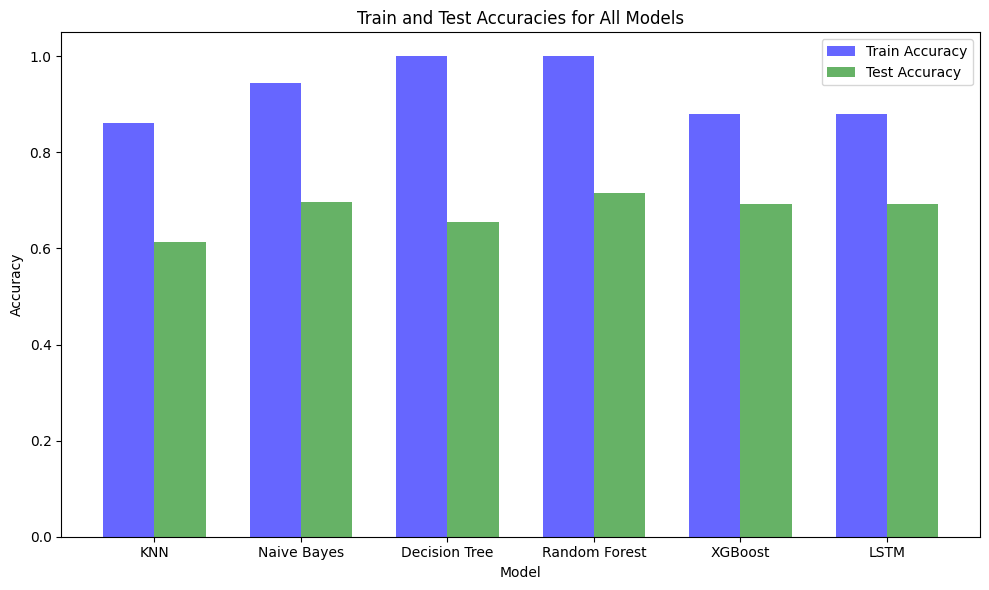

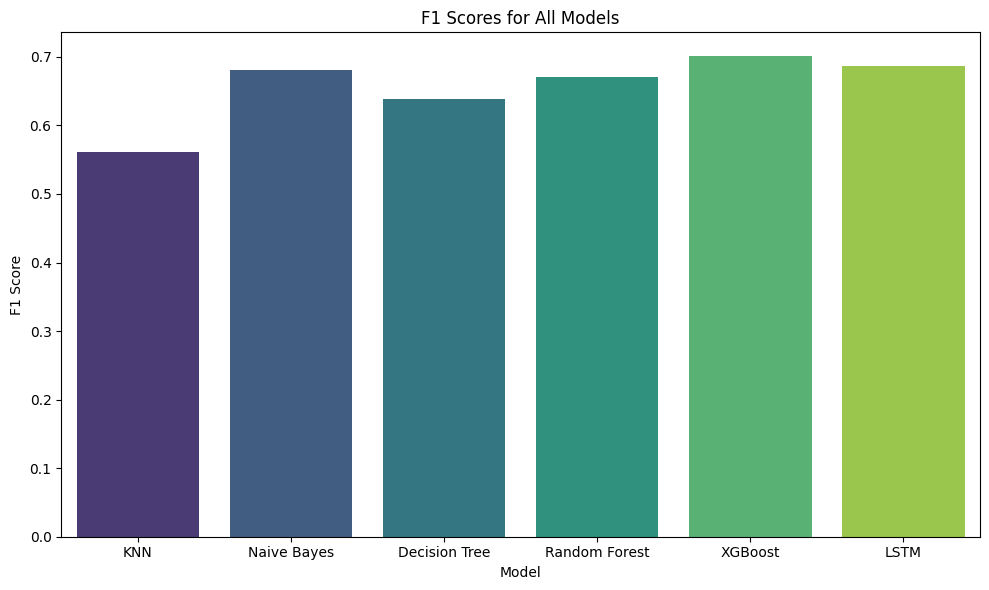

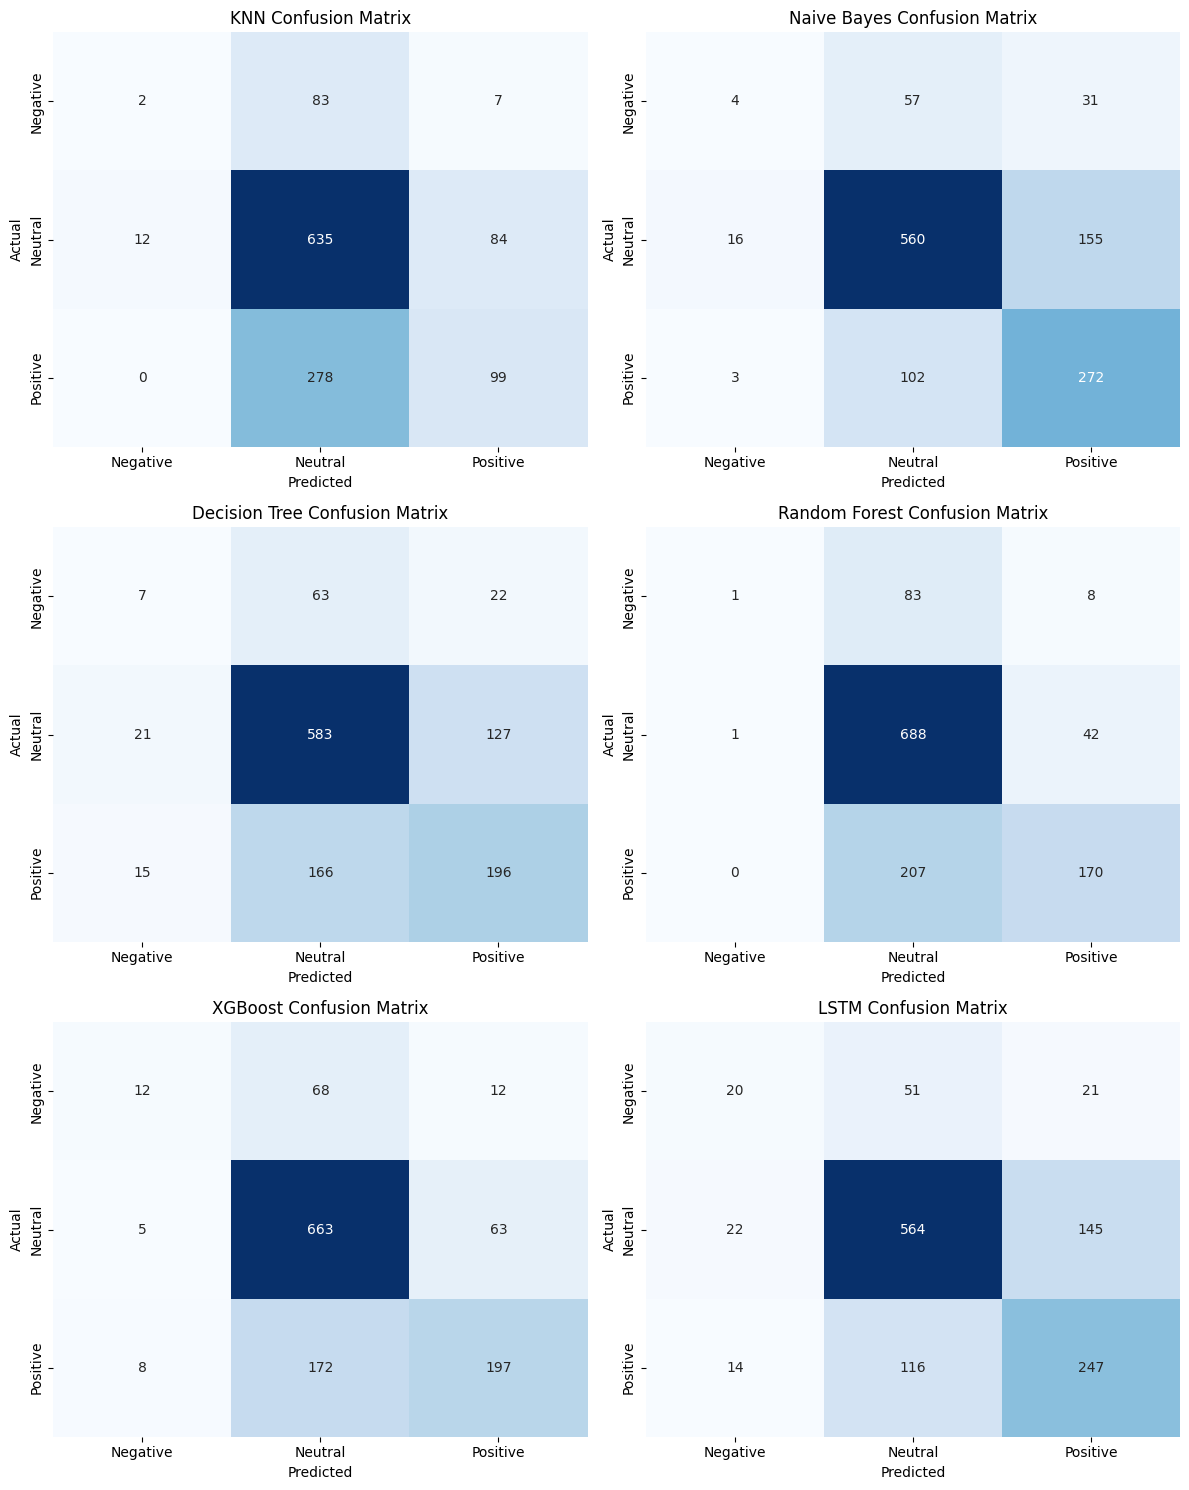

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Consolidate results into a dictionary
results = {
    "Model": ["KNN", "Naive Bayes", "Decision Tree", "Random Forest", "XGBoost", "LSTM"],
    "Train Accuracy": [
        KNN_model.score(X_train, y_train),
        MNB_model.score(X_train, y_train),
        DT_model.score(X_train, y_train),
        RF_model.score(X_train, y_train),
        train_accuracy,
        train_accuracy
    ],
    "Test Accuracy": [
        KNN_model.score(X_test, y_test),
        MNB_model.score(X_test, y_test),
        DT_model.score(X_test, y_test),
        RF_model.score(X_test, y_test),
        test_accuracy,
        test_accuracy
    ]
}

# Generate F1 scores for the test data
f1_scores = [
    classification_report(y_test, y_pred_knn, output_dict=True)["weighted avg"]["f1-score"],
    classification_report(y_test, y_pred_mnb, output_dict=True)["weighted avg"]["f1-score"],
    classification_report(y_test, y_pred_dt, output_dict=True)["weighted avg"]["f1-score"],
    classification_report(y_test, y_pred_rf, output_dict=True)["weighted avg"]["f1-score"],
    classification_report(y_test_adjusted, y_pred_xgb, output_dict=True)["weighted avg"]["f1-score"],
    classification_report(y_test_lstm_classes, y_pred_lstm_classes, output_dict=True)["weighted avg"]["f1-score"]
]

results["F1 Score"] = f1_scores

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print results for reference
print(results_df)

# Plot Train and Test Accuracies
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(results_df["Model"]))

plt.bar(index, results_df["Train Accuracy"], bar_width, label="Train Accuracy", color="blue", alpha=0.6)
plt.bar([i + bar_width for i in index], results_df["Test Accuracy"], bar_width, label="Test Accuracy", color="green", alpha=0.6)

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Train and Test Accuracies for All Models")
plt.xticks([i + bar_width / 2 for i in index], results_df["Model"])
plt.legend()
plt.tight_layout()
plt.show()

# Plot F1 Scores
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="F1 Score", data=results_df, palette="viridis", hue="Model", dodge=False, legend=False)
plt.title("F1 Scores for All Models")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.show()

# Confusion Matrix Visualization for each model
conf_matrices = [
    (conf_matrix_knn, "KNN"),
    (conf_matrix_mnb, "Naive Bayes"),
    (conf_matrix_dt, "Decision Tree"),
    (conf_matrix_rf, "Random Forest"),
    (conf_matrix_xgb, "XGBoost"),
    (confusion_matrix(y_test_lstm_classes, y_pred_lstm_classes), "LSTM")
]

label_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}

fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()

for i, (conf_matrix, model_name) in enumerate(conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    x_labels = [label_mapping.get(i, str(i)) for i in range(len(conf_matrix))]
    y_labels = [label_mapping.get(i, str(i)) for i in range(len(conf_matrix))]
    axes[i].set_title(f"{model_name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
    axes[i].set_xticklabels(x_labels)
    axes[i].set_yticklabels(y_labels)

plt.tight_layout()
plt.show()


### III. Conclusions

#### 9. Performance Analysis & Comparative Discussion
Results were visualized using bar plots for accuracy and F1 scores. Key findings include:
- Statistical models performed well on small datasets with straightforward features.
- LSTM outperformed statistical models on F1-Score and accuracy, demonstrating its ability to capture contextual nuances.
- Naïve Bayes exhibited fast training but lower accuracy on complex data.
- Decision Trees, Random Forests and XG Boost showed good performance but were computationally intensive.

#### 10. Project Summary and Reflections
This project highlighted the strengths and weaknesses of statistical versus embedding-based models in sentiment classification. While traditional models are efficient for simple tasks, deep learning models excel in handling complex language structures. Future directions include:
- Expanding the dataset size.
- Experimenting with transformer-based models like BERT.
- Adapting the approach to other domains such as fake news detection or spam filtering.

This work contributes to understanding the trade-offs between simplicity and performance in text classification, providing insights for real-world applications.

